# 0. Introdução

A análise abaixo foi feita utilizando dados das demissões em massa das empresas de tecnologia no contexto atual (nov/22), disponibilizados pelas seguintes plataformas: Bloomberg, San Francisco Business Times, TechCrunch e The New York Times. Os dados podem ser encontrados em: https://www.kaggle.com/datasets/swaptr/layoffs-2022.

Desde que a pandemia da COVID-19 se iniciou (mar/20) até os dias de hoje, as empresas de tecnologia ao redor do mundo estão lutando contra a crise econômica imposta por esse cenário, impulsionada, também, por outros fatores. A Amazon perdeu cerca de USD 1 trilhão em avaliação de mercado, de acordo com a Bloomberg, enquanto a Microsoft não ficou muito longe, com perdas de valor de mercado na casa dos USD 889 bilhões.

Assim, com a diminuição do consumo, taxas de juros altas e a valorização do dólar globalmente, o mundo parece estar entrando em uma grande recessão. Por isso, as empresas de tecnologia estão demitindo em massa. 

Um exemplo concreto disso é a demissão realizada pela Meta de aproximadamente 13% de sua força de trabalho, o que representa 11.000 funcionários. Outro exemplo que pode ser citado é o do Twitter que, após ter sido comprado por Elon Musk, teve metade de seus funcionários demitidos.

<br>

**Descrição dos dados**

- "company": nome da empresa; <br>
- "location": local das demissões realizadas pela empresa; <br>
- "industry": indústria da companhia; <br>
- "total_laid_off": número de empregados demitidos; <br>
- "percentage": porcentagem de empregados da empresa que foram demitidos; <br>
- "date": data das demissões; <br>
- "funds_raised": quanto a empresa captou (em milhões de dólares); <br>
- "stage": estágio de captação da empresa; <br>
- "country": país da demissão;

<br>

**Perguntas que tentaremos responder com o dataset:**
* Quais setores de indústria mais demitem?
* Em quais regiões se localizam as empresas que mais demitem?
* Quais países mais ocorreram demissões?
* Qual a relação entre o quanto a empresa captou e as demissões?
* Em quais períodos mais ocorreram demissões em números absolutos?

# 1. Carregando bibliotecas

In [117]:
#Rodar o comando abaixo para installar a biblioteca que permite a visualização de nulos

#!pip install missingno

In [160]:
# Manipulação de dados
import pandas as pd
import numpy as np

#Visualizar nulos
import missingno as msno

#Manipular avisos do pandas
import warnings

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
#Configurando o estilo dos gráficos
plt.style.use('ggplot')

#Não exibir avisos
warnings.filterwarnings('ignore')

In [247]:
biggest_laidoffs_by_column = df.groupby("country")["total_laid_off"].sum().sort_values(ascending=False)

In [273]:
#Funções criadas
def groupby_and_countplot_sum_layoff(column, title, xlabel, ylabel, num=999, analysed="total_laid_off"): 
    biggest_laidoffs_by_column = df.groupby(column)[analysed].sum().sort_values(ascending=False)
    _ = plt.figure(figsize=(15, 7))
    _ = sns.barplot(x=biggest_laidoffs_by_column.index[:num],
                    y=biggest_laidoffs_by_column.values[:num])
    _ = plt.title(title)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.xticks(rotation=90)
    


# 2. Carregando o Dataset

In [120]:
df = pd.read_csv("./layoffs.csv")

In [121]:
df.head()

,company,location,industry,total_laid_off,percentage,date,funds_raised,stage,country
0,Veev,SF Bay Area,Real Estate,100.0,0.30,2022-11-11,597.0,Series D,United States
1,GoTo Group,Jakarta,Transportation,1000.0,0.10,2022-11-10,1300.0,Unknown,Indonesia
2,Juul,SF Bay Area,Consumer,400.0,0.30,2022-11-10,1500.0,Unknown,United States
3,InfluxData,SF Bay Area,NaN,65.0,0.27,2022-11-10,119.0,Series D,United States
4,Coinbase,SF Bay Area,Crypto,60.0,NaN,2022-11-10,549.0,IPO,United States


### 2.1 Analisando a estrutura do DataFrame

#### 2.1.1 Formato e informações gerais

In [122]:
#Formato (linhas, colunas)
df.shape

(1574, 9)

In [123]:
#Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1574 non-null   object 
 1   location        1574 non-null   object 
 2   industry        1571 non-null   object 
 3   total_laid_off  1132 non-null   float64
 4   percentage      1053 non-null   float64
 5   date            1574 non-null   object 
 6   funds_raised    1472 non-null   float64
 7   stage           1570 non-null   object 
 8   country         1574 non-null   object 
dtypes: float64(3), object(6)
memory usage: 110.8+ KB


* Observando os tipos das colunas, vemos que será necessário transformar a coluna "date" para o tipo 'datetime'.
* Existem valores nulos

#### 2.1.2 Convertendo a coluna de data para o formato ideal

In [124]:
#Convertendo a coluna 'date' para o tipo datetime
df["date"] = pd.to_datetime(df["date"])

#Criando as colunas de ano e mês
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)
df["year_month"] = df['date'].dt.to_period('M')

#### 2.1.3 Verificando nulos

In [125]:
#Verificando nulos por coluna
df.isnull().sum()

company             0
location            0
industry            3
total_laid_off    442
percentage        521
date                0
funds_raised      102
stage               4
country             0
year                0
month               0
year_month          0
dtype: int64

Uma outra maneira interessante e intuitiva de visualizar a quantidade de nulos por coluna é utilizando a biblioteca "missingno", principalmente quando temos muitas colunas. Os espaços em branco representam os nulos.

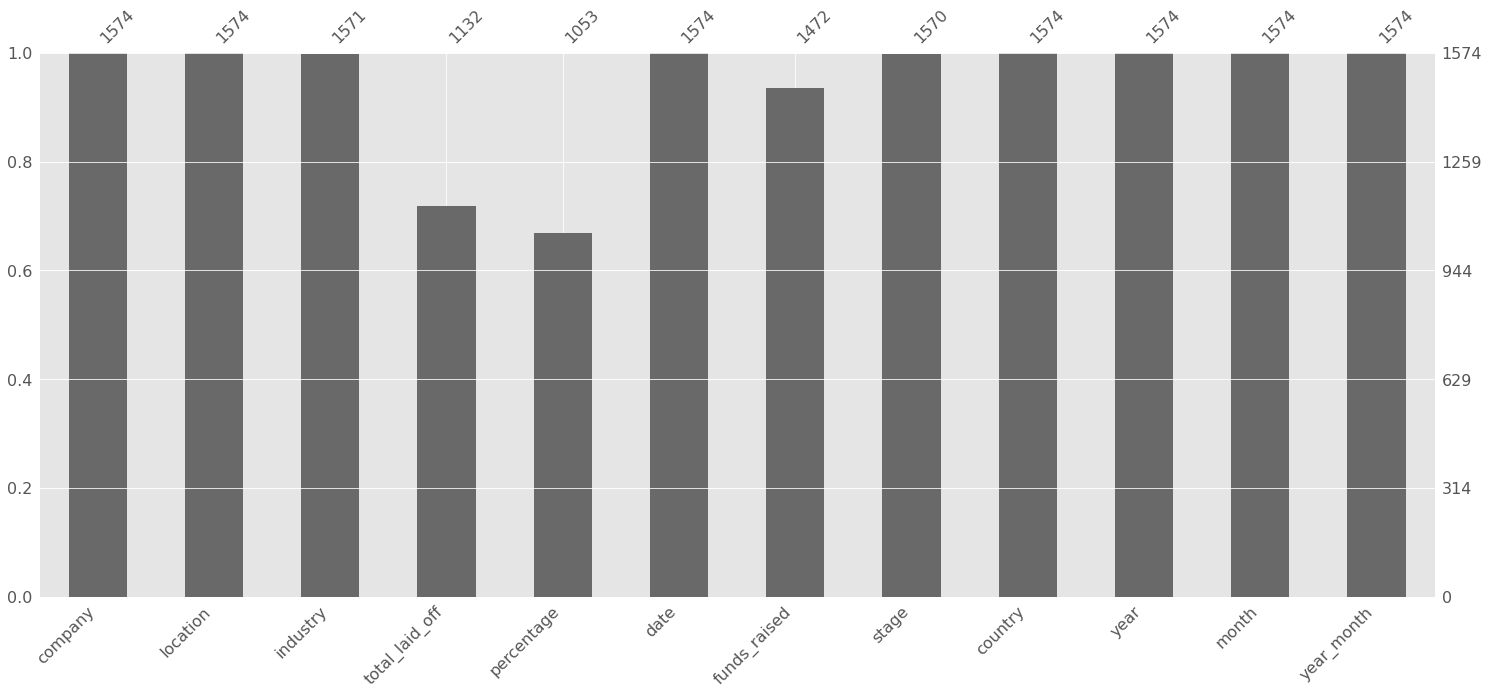

In [126]:
#Verificando nulos por coluna utilizando a biblioteca missingno
msno.bar(df);

In [127]:
#Eliminando linhas que possuem nulo tanto para o número total de demitidos quanto para a porcentagem
df = df[~((df["total_laid_off"].isnull()) & (df["percentage"].isnull()))]

#### 2.1.4 Lidando com linhas duplicadas

In [128]:
#Verificando se existem linhas exatamente iguais
df[df.duplicated(keep=False)]

,company,location,industry,total_laid_off,percentage,date,funds_raised,stage,country,year,month,year_month
720,Cazoo,London,Transportation,750.0,0.15,2022-06-07,2000.0,IPO,United Kingdom,2022,6,2022-06
721,Cazoo,London,Transportation,750.0,0.15,2022-06-07,2000.0,IPO,United Kingdom,2022,6,2022-06


In [129]:
#Eliminando linhas exatamente iguais
df.drop_duplicates(inplace=True)

Além dessa única empresa que possuia dois registros exatamente iguais, precisamos considerar o fato de que uma empresa possui múltiplas linhas, ou melhor dizendo, demitiu mais de uma vez em diferentes sedes da empresa e em diferentes períodos. Precisamos considerar isso para entregar análises mais fiéis. Portanto, tratarei isso agora, da seguinte maneira:

* Múltiplas linhas de uma mesma sede da empresa serão agregadas em uma só linha. Ex: Tenho 3 registros de demissões da Uber dos USA, irei somar todas as demissões e resumir isso em uma linha.



In [177]:
#Selecionando as múltiplas linhas de uma mesma empresa
duplicated = df[df.duplicated(subset="company", keep=False)].sort_values("company")

#Imputando NaN's com 0
duplicated.fillna(0, inplace=True)

In [193]:
#Criando dataframe sem essas linhas duplicadas
df_without_duplicated = df.drop(duplicated.index, axis=0)

#Eliminando a coluna porcentagem pois com a agregação ela não terá sentido
df_without_duplicated = df_without_duplicated.drop("percentage", axis=1)

In [194]:
#Código para fazer a agregação em 1 só linha
for company in duplicated.company.unique():
    subset = duplicated[duplicated["company"] == company].sort_values(by="year_month", ascending=False).reset_index(drop=True)
    subset.loc[0, ["total_laid_off"]] = subset.loc[0, ["total_laid_off"]] + subset.loc[1:]["total_laid_off"].sum()
    duplicated = duplicated[~(duplicated["company"] == company)]
    duplicated = duplicated.append(subset.loc[0])

In [200]:
df_without_duplicated = pd.concat([df_without_duplicated, duplicated])

### 2.2 Analisando estatísticas gerais dos dados

In [137]:
df.describe()

,total_laid_off,percentage,funds_raised,year,month
count,1131.000000,1052.000000,1263.000000,1343.000000,1343.000000
mean,190.928382,0.277878,980.800281,2021.183917,6.204765
std,511.734362,0.266417,7162.335934,0.970340,2.401982
min,3.000000,0.000000,0.000000,2020.000000,1.000000
25%,30.000000,0.100000,42.000000,2020.000000,4.000000
50%,70.000000,0.200000,131.000000,2022.000000,6.000000
75%,150.000000,0.330000,377.500000,2022.000000,8.000000
max,11000.000000,1.000000,121900.000000,2022.000000,12.000000


* A média de empregados demitidos por empresa é de 191, enquanto a mediana é de 70.


* O máximo de empregados demitidos por uma empresa foi de 11.000 (caso da Meta, citado na introdução)


* Existem algumas empresas que possuíram 100% dos empregados demitidos.
    - É preciso averiguar a consistência disso. Possivelmente isso é algum erro.

# 3. Análise Univariada

### 3.1 Distribuição das variáveis 'total_laid_off' & 'percentage'

#### 3.1.1 'total_laid_off'

In [138]:
#Variância da variável 'total_laid_off'
df["total_laid_off"].var()

261872.05769817607

Como a variância dessa variável é muito grande, os gráficos ficarão distorcidos. Portanto, é preciso aplicar uma transformação nesses dados, no caso, a transformação logarítimica, para colocá-los em uma escala parecido e tornar mais fácil a visualização, sem perder a noção da variação dos dados.

In [139]:
#Aplicando a transformação logarítimica
total_laidoff_transformed = np.log(df["total_laid_off"])

In [140]:
#Verificando novamente a variância da variável
total_laidoff_transformed.var()

1.517691659711607

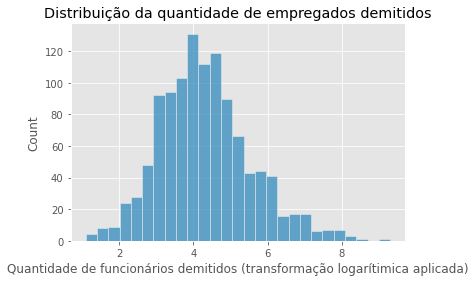

In [141]:
_ = sns.histplot(total_laidoff_transformed)
_ = plt.title("Distribuição da quantidade de empregados demitidos")
_ = plt.xlabel("Quantidade de funcionários demitidos (transformação logarítimica aplicada)")

A variável segue uma distribuição quase simétrica, que se aproxima da distribuição normal.

#### 3.1.2 'percentage'

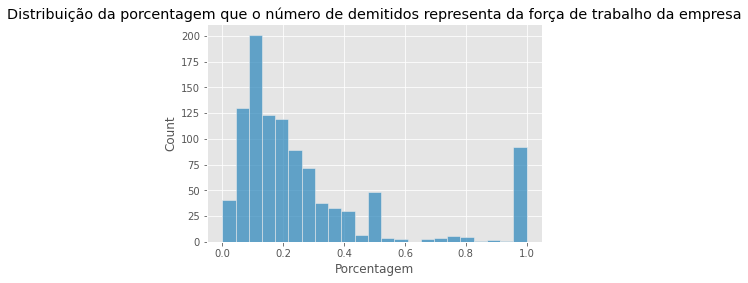

In [142]:
_ = sns.histplot(df["percentage"])
_ = plt.title("Distribuição da porcentagem que o número de demitidos representa da força de trabalho da empresa")
_ = plt.xlabel("Porcentagem")

A maioria das empresas realizou demissões que representam aproximadamente entre 0 e 30% da força de trabalho total da empresa. É vísivel a existência de algumas empresas que demitiram 100% de seus funcionários. Estas podem ter fechado as portas e de fato demitido todos os funcionários. No entanto, isso deve ser averiguado melhor.

In [143]:
#Verificando quantas empresas demitiram 100% dos funcionários
df[df["percentage"] == 1].shape[0]

90

In [199]:
#Verificando algumas dessas
df[df["percentage"] == 1].sort_values(by="total_laid_off", ascending=False)[["company", "location", "industry"]]

,company,location,industry
914,Katerra,SF Bay Area,Construction
533,Butler Hospitality,New York City,Food
1122,Deliv,SF Bay Area,Retail
1140,Jump,New York City,Transportation
831,SEND,Sydney,Food
...,...,...,...
1278,Purse,SF Bay Area,Crypto
1430,The Modist,Dubai,Retail
1557,Service,Los Angeles,Travel
1564,Popin,New York City,Fitness


Pesquisando pelas notícias de algumas dessas empresas, das pesquisadas, de fato, todas tiveram suas operações encerradas e, portanto, acabaram sem funcionário algum. Abaixo seguem algumas matérias de algumas delas.

Planelty - https://www.axios.com/pro/climate-deals/2022/11/04/planetly-shuts-down-layoffs-carbon-accounting <br>
Katerra - https://therealdeal.com/2021/06/14/katerra-employees-fire-back-with-lawsuit-over-abrupt-closure/ <br>
Butler Hospitality - https://www.youtube.com/watch?v=YQBdVZ6Ez4I

Desse modo, considerarei que todas essas 90 empresas obtiveram suas portas fechadas.

### 3.2 Análise da Indústria

#### 3.2.1 Setores mais frequentes

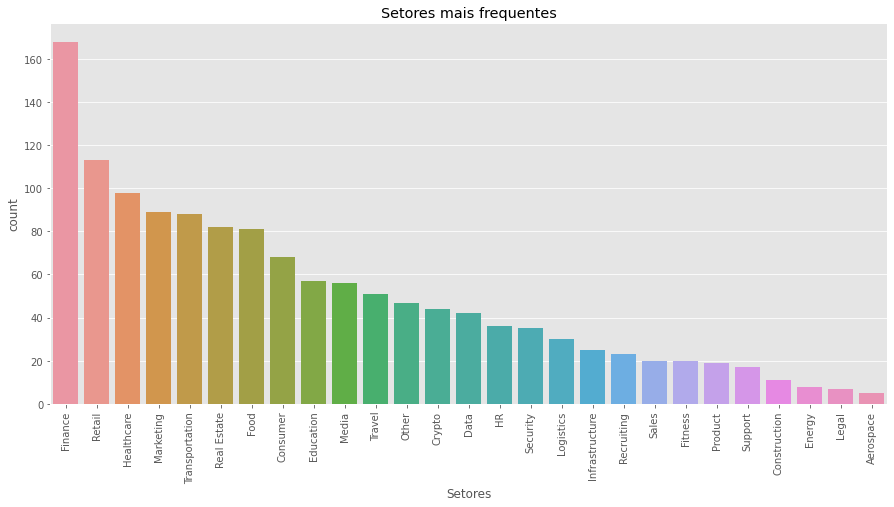

In [145]:
_ = plt.figure(figsize=(15, 7))
_ = sns.countplot(data=df, x="industry", order=df['industry'].value_counts().index)
_ = plt.title("Setores mais frequentes")
_ = plt.xlabel("Setores")
_ = plt.xticks(rotation=90)

# 4. Análise Multivariada

### 4.1 Indústria x LayOffs

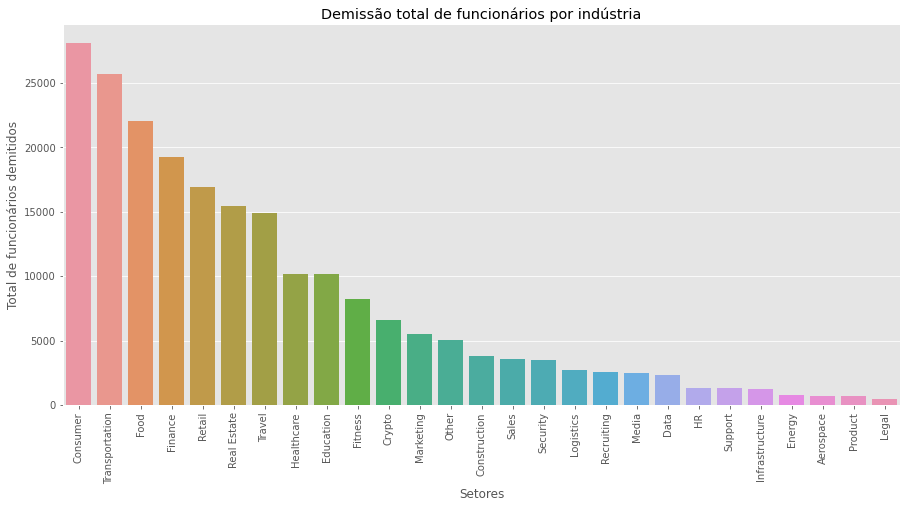

In [261]:
#Agrupando por indústria e verificando o total de funcionários demitidos pelas empresas de cada indústria
groupby_and_countplot_sum_layoff("industry", 
                 "Demissão total de funcionários por indústria",
                 "Setores",
                 "Total de funcionários demitidos")

A partir dos dados disponibilizados, podemos dizer que os 5 setores de indústria que mais demitem são: <br>
   1. Consumo 
   2. Transportes 
   3. Comida 
   4. Financeiro
   5. Varejo 
    
E os que menos demitem:
   1. Legal 
   2. Produtos
   3. Aeroespacial 
   4. Energia
   5. Infraestrutura

### 4.2 Países x LayOffs

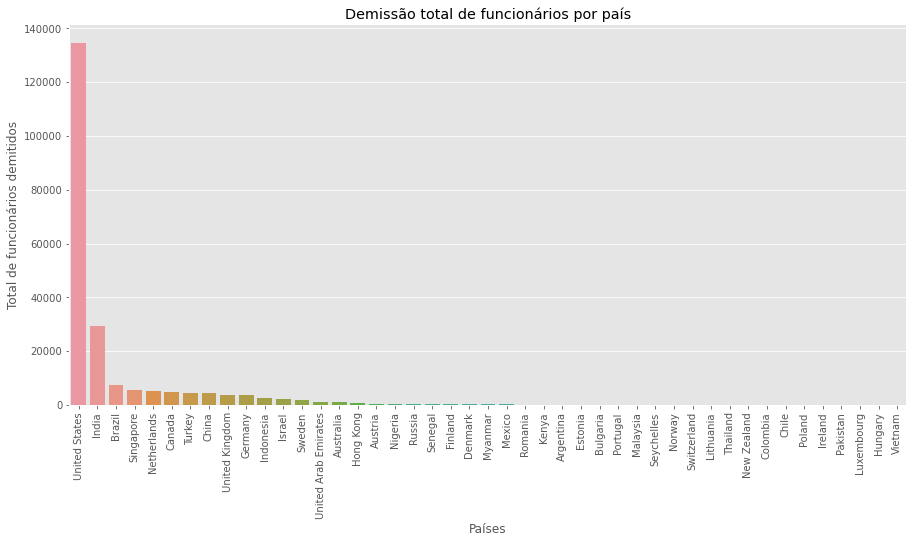

In [260]:
#Agrupando por países e verificando o total de funcionários demitidos pelas empresas de cada país
groupby_and_countplot_sum_layoff("country",
                            "Demissão total de funcionários por país",
                            "Países",
                            "Total de funcionários demitidos")

A partir dos dados disponibilizados, podemos dizer que os 5 países que mais demitem são: <br>
   1. Estados Unidos 
   2. Índia 
   3. Brasil
   4. Singapura
   5. Holanda

### 4.3 Estágio da empresa x LayOffs

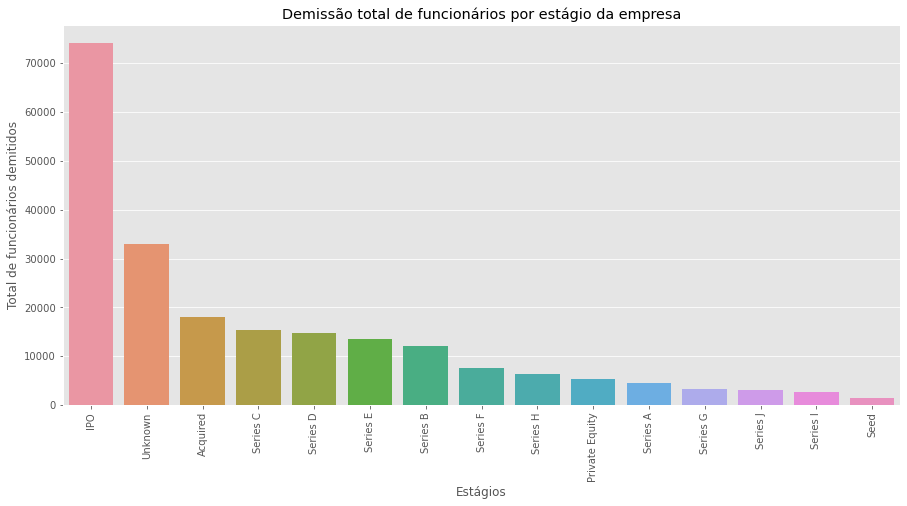

In [259]:
groupby_and_countplot_sum_layoff("stage",
                           "Demissão total de funcionários por estágio da empresa",
                           "Estágios",
                           "Total de funcionários demitidos")

### 4.4 Quanto a empresa captou x LayOffs (% em relação ao total de funcionários)

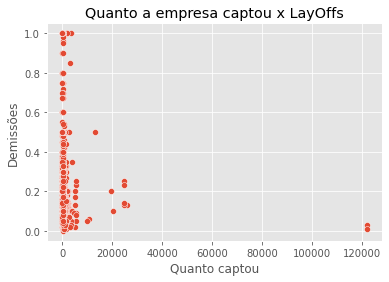

In [240]:
_ = sns.scatterplot(data=df, x="funds_raised", y="percentage")
_ = plt.title("Quanto a empresa captou x LayOffs")
_ = plt.xlabel("Quanto captou")
_ = plt.ylabel("Demissões")

De maneira geral, não é possível verificar uma correlação entre essas variáveis. O que mostra que o quanto a empresa captou não influência de maneira determinante na quantidade de funcionários que ela está demitindo.

Podemos visualizar isso também por meio da análise do coeficiente de correlação de Pearson, que mostra o quanto duas variáveis estão correlacionadas, sendo o valor 0 indicativo de nenhuma correlação linear entre as variáveis.

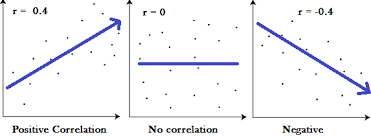

In [241]:
df[["funds_raised", "percentage"]].corr()

,funds_raised,percentage
funds_raised,1.000000,-0.071688
percentage,-0.071688,1.000000


Isso comprova o que é exibido no gráfico.

### 4.5 Localização da empresa x LayOffs

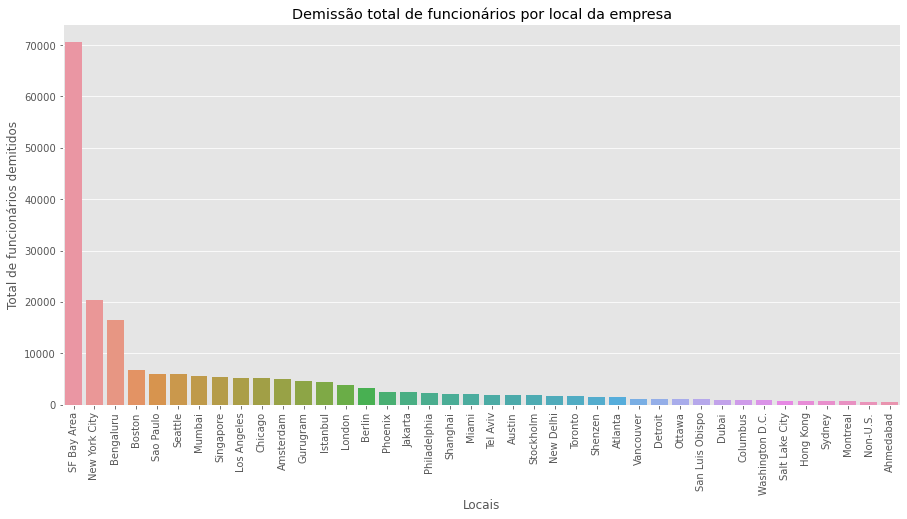

In [274]:
groupby_and_countplot_sum_layoff("location",
                           "Demissão total de funcionários por local da empresa",
                           "Locais",
                           "Total de funcionários demitidos", 40)

### 4.6 Período x LayOffs

Para não criarmos nenhum viés em relação a essa análise, precisamos analisar, no total, a proporção de registros de demissões em cada data

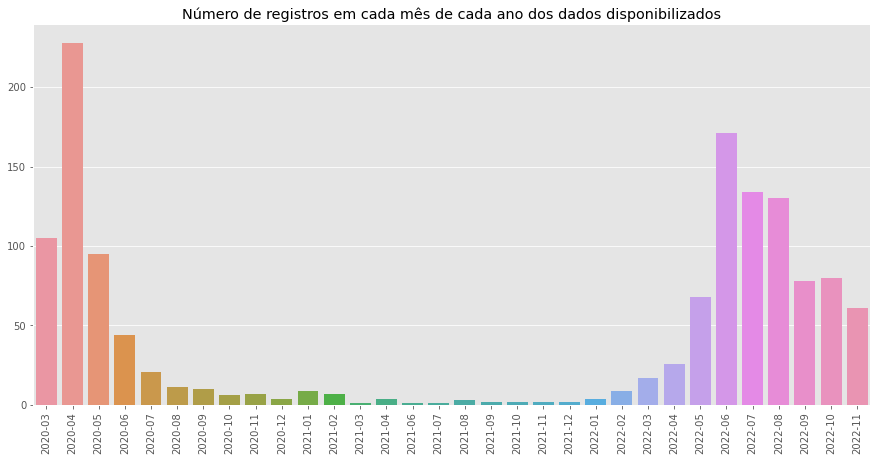

In [286]:
_ = plt.figure(figsize=(15, 7))
_ = sns.barplot(x=df.year_month.value_counts().sort_index().index,
                y=df.year_month.value_counts().sort_index().values)
_ = plt.title("Número de registros em cada mês de cada ano dos dados disponibilizados")
_ = plt.xticks(rotation=90)

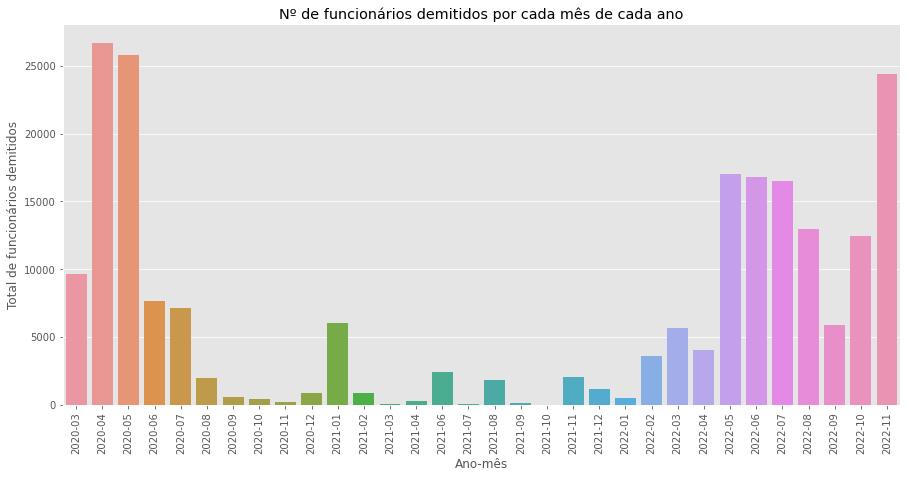

In [293]:
_ = plt.figure(figsize=(15, 7))
_ = sns.barplot(x=df.groupby("year_month")["total_laid_off"].sum().sort_index().index,
                y=df.groupby("year_month")["total_laid_off"].sum().sort_index().values)
_ = plt.title("Nº de funcionários demitidos por cada mês de cada ano")
_ = plt.xlabel("Ano-mês")
_ = plt.ylabel("Total de funcionários demitidos")
_ = plt.xticks(rotation=90)